In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from plotting import plot

In [2]:
dataset = load_iris()
x = dataset.data[:, :2]
y = dataset.target

idx = np.random.permutation(len(x))
x = x[idx]
y = y[idx]

print("Samples: ", len(x))

Samples:  150


In [3]:
df = pd.DataFrame(x, columns=dataset.feature_names[:2])
df.head()

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8


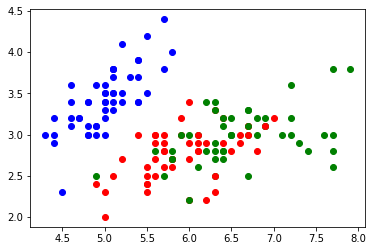

In [4]:
colors = ["blue", "red", "green"]
for i, p in enumerate(x):
    plt.scatter(p[0], p[1], color=colors[y[i]])
plt.show()

In [5]:
class kMeans:
    def __init__(self, n_cluster=3, max_iter=100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        
    def fit(self, x):
        idx = np.random.permutation(len(x))[:self.n_cluster]
        self.centroids = x[idx]
        self.start_centroids = self.centroids.copy()
        # Start training
        for _ in range(self.max_iter):
            self.assignment = {
                i: [] for i in range(self.n_cluster)
            }
            # Step 1: Assignment
            for point in x:
                distance_centroids = [
                    np.linalg.norm(point - centroid) for centroid in self.centroids
                ]
                nearest_centroid = np.argmin(distance_centroids, axis=0)
                self.assignment[nearest_centroid].append([point[0], point[1]])
            # Step 2: Update 
            for i in range(self.n_cluster):
                if len(self.assignment[i]) > 0:
                    self.centroids[i] = np.mean(self.assignment[i], axis=0)
        return self.centroids, self.start_centroids 
    
    def predict(self, x):
        y = np.array([0 for _ in range(len(x))])
        for i, x_p in enumerate(x):
            distances = np.array(
                [np.linalg.norm(centroids[j] - x_p) for j in range(self.n_cluster)]
            )
            cluster = np.argmin(distances)
            y[i] = cluster
        return y

In [6]:
kmeans = kMeans(n_cluster=3, max_iter=100)
centroids, start_centroids = kmeans.fit(x)
y_pred = kmeans.predict(x)

print(centroids)
print(start_centroids)
print(y_pred)

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]
[[6.7 3. ]
 [4.7 3.2]
 [5.5 2.4]]
[2 1 0 2 0 1 2 0 2 2 0 1 1 1 1 0 0 2 2 0 1 2 1 0 0 0 0 0 1 1 1 1 0 1 1 2 0
 1 1 1 2 2 0 1 1 2 2 0 0 0 2 0 2 1 0 2 1 1 1 2 2 1 1 1 2 1 2 0 1 2 2 1 2 2
 2 2 0 2 1 2 0 1 1 2 0 1 2 1 1 2 2 0 2 2 0 2 1 1 2 0 1 1 1 2 0 1 0 0 1 2 0
 2 0 0 1 0 2 0 2 2 2 1 0 2 1 2 0 0 1 2 0 0 1 0 1 0 0 0 2 0 2 0 2 2 1 2 2 1
 2 0]


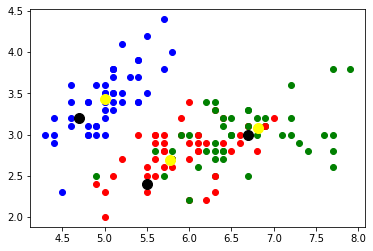

In [7]:
colors = ["blue", "red", "green"]
for i, p in enumerate(x):
    plt.scatter(p[0], p[1], color=colors[y[i]])
plt.scatter(centroids[:,0], centroids[:,1], color="yellow", s=100)
plt.scatter(start_centroids[:,0], start_centroids[:,1], color="black", s=100)
plt.show()

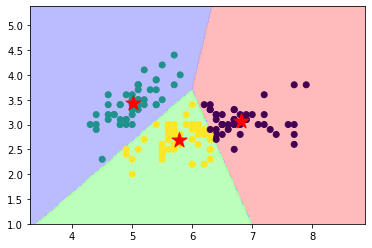

In [8]:
plot(x, y, y_pred, centroids, kmeans)